In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


import warnings
warnings.filterwarnings('ignore')


mouse_drug_data_file = "mouse_drug_data.csv"
clinical_trial_data_file = "clinicaltrial_data.csv"

In [2]:
mouse_data_df = pd.read_csv(mouse_drug_data_file)
clinical_data_df = pd.read_csv(clinical_trial_data_file)
print(mouse_data_df.head())
print(clinical_data_df.head())

  Mouse ID      Drug
0     f234  Stelasyn
1     x402  Stelasyn
2     a492  Stelasyn
3     w540  Stelasyn
4     v764  Stelasyn
  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0


In [3]:
all_data = clinical_data_df.merge(mouse_data_df, on = "Mouse ID", how = "outer")
all_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [4]:
reduced_data = all_data[(all_data["Drug"] == 'Capomulin') |
                      (all_data["Drug"] == 'Infubinol') |
                      (all_data["Drug"] == 'Ketapril') |
                      (all_data["Drug"] == 'Placebo')]
reduced_data.head()
all_data = reduced_data
all_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [5]:
avg_volume = pd.DataFrame(all_data.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"])
avg_volume = avg_volume.unstack(level = 0)
avg_volume



Tumor Volume (mm3)                                 
Drug               Capomulin  Infubinol   Ketapril    Placebo
Timepoint                                                    
0                  45.000000  45.000000  45.000000  45.000000
5                  44.266086  47.062001  47.389175  47.125589
10                 43.084291  49.403909  49.582269  49.423329
15                 42.064317  51.296397  52.399974  51.359742
20                 40.716325  53.197691  54.920935  54.364417
25                 39.939528  55.715252  57.678982  57.482574
30                 38.769339  58.299397  60.994507  59.809063
35                 37.816839  60.742461  63.371686  62.420615
40                 36.958001  63.162824  66.068580  65.052675
45                 36.236114  65.755562  70.662958  68.084082

In [6]:
volume_sem = pd.DataFrame(all_data.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"])
volume_sem = volume_sem.unstack(level=0)
volume_sem.head()

Tumor Volume (mm3)                              
Drug               Capomulin Infubinol  Ketapril   Placebo
Timepoint                                                 
0                   0.000000  0.000000  0.000000  0.000000
5                   0.448593  0.235102  0.264819  0.218091
10                  0.702684  0.282346  0.357421  0.402064
15                  0.838617  0.357705  0.580268  0.614461
20                  0.909731  0.476210  0.726484  0.839609

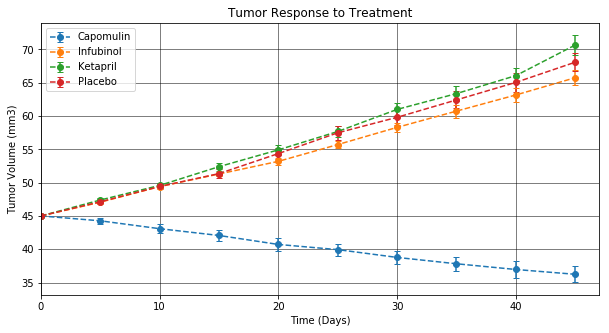

In [7]:
plt.figure(figsize = (10,5))
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.xticks(np.arange(0, avg_volume.index.max()+2 , 10))
plt.xlim(0, avg_volume.index.max() + 2)
xvals = avg_volume.index
plt.grid(color="black", linestyle="-", linewidth=.5)


for drug in avg_volume.columns:
    plt.errorbar(xvals, 
                 avg_volume[drug], 
                 volume_sem[drug], 
                 label = drug[1],
                 linestyle = "--", 
                 marker = "o",
                 capthick = 1, 
                 capsize = 3)
  
plt.legend(loc=0)

    

In [8]:
#Metastatic Response to Treatment
met_spread = pd.DataFrame(all_data.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"])
met_spread = met_spread.unstack(level = 0)
met_spread


Metastatic Sites                              
Drug             Capomulin Infubinol  Ketapril   Placebo
Timepoint                                               
0                 0.000000  0.000000  0.000000  0.000000
5                 0.160000  0.280000  0.304348  0.375000
10                0.320000  0.666667  0.590909  0.833333
15                0.375000  0.904762  0.842105  1.250000
20                0.652174  1.050000  1.210526  1.526316
25                0.818182  1.277778  1.631579  1.941176
30                1.090909  1.588235  2.055556  2.266667
35                1.181818  1.666667  2.294118  2.642857
40                1.380952  2.100000  2.733333  3.166667
45                1.476190  2.111111  3.363636  3.272727

In [9]:
met_spread_err = pd.DataFrame(all_data.groupby(['Drug', 'Timepoint']).sem()['Metastatic Sites'])
met_spread_err = met_spread_err.unstack(level = 0)

met_spread_err

Metastatic Sites                              
Drug             Capomulin Infubinol  Ketapril   Placebo
Timepoint                                               
0                 0.000000  0.000000  0.000000  0.000000
5                 0.074833  0.091652  0.098100  0.100947
10                0.125433  0.159364  0.142018  0.115261
15                0.132048  0.194015  0.191381  0.190221
20                0.161621  0.234801  0.236680  0.234064
25                0.181818  0.265753  0.288275  0.263888
30                0.172944  0.227823  0.347467  0.300264
35                0.169496  0.224733  0.361418  0.341412
40                0.175610  0.314466  0.315725  0.297294
45                0.202591  0.309320  0.278722  0.304240

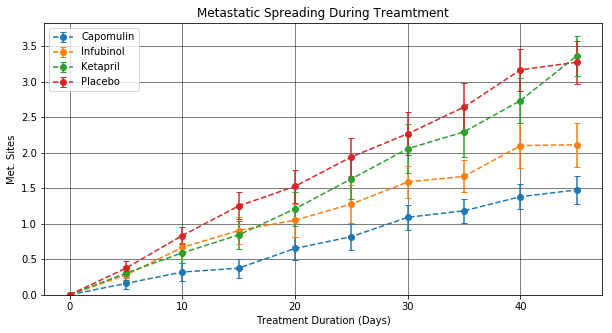

In [10]:
plt.figure(figsize = (10,5))
plt.title("Metastatic Spreading During Treamtment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.xticks(np.arange(0, met_spread.index.max()+2, 10))
plt.ylim(0, met_spread.max().max() + met_spread_err.max().max() + .1)
xvals = met_spread.index
plt.grid(color="black", linestyle="-", linewidth=.5)

for drug in met_spread:
    plt.errorbar(xvals, 
                 met_spread[drug], 
                 met_spread_err[drug], 
                 label = drug[1],
                 linestyle = "--", 
                 marker = "o", #markers defined above
                 capthick = 1, 
                 capsize = 3)
    
plt.legend(loc=0)

In [11]:
#Survival Rates
live_mice = pd.DataFrame(all_data.groupby(['Drug', 'Timepoint']).count()['Mouse ID'])
live_mice = live_mice.unstack(level = 0)
live_mice

Mouse ID                           
Drug      Capomulin Infubinol Ketapril Placebo
Timepoint                                     
0                25        25       25      25
5                25        25       23      24
10               25        21       22      24
15               24        21       19      20
20               23        20       19      19
25               22        18       19      17
30               22        17       18      15
35               22        12       17      14
40               21        10       15      12
45               21         9       11      11

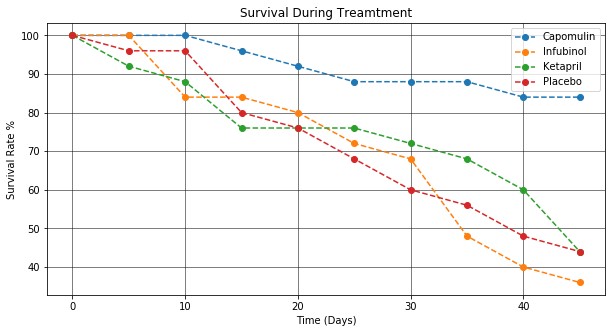

In [12]:
plt.figure(figsize = (10,5))
plt.title("Survival During Treamtment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate %")
plt.xticks(np.arange(0, live_mice.index.max()+2, 10))
xvals = met_spread.index
plt.grid(color="black", linestyle="-", linewidth=.5)

for drug in live_mice:
    yvals = live_mice[drug]/live_mice.loc[0,drug] * 100
    
    plt.plot(xvals, 
             yvals, 
             linestyle = "--", 
             marker = "o",
             label = drug[1],
             )
    
    
    
plt.legend(loc=0)

In [13]:
#Summary Bar Graph
change_volume = (avg_volume.loc[45, :] - avg_volume.loc[0, :])/avg_volume.loc[0, :] * 100
change_volume


                    Drug     
Tumor Volume (mm3)  Capomulin   -19.475303
                    Infubinol    46.123472
                    Ketapril     57.028795
                    Placebo      51.297960
dtype: float64

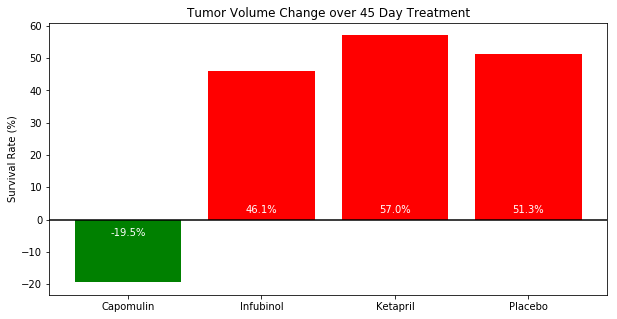

In [14]:
plt.figure(figsize = (10,5))
plt.title("Tumor Volume Change over 45 Day Treatment")
plt.ylabel('Survival Rate (%)')
plt.axhline(y=0, color = "black")
xlabels = [change_volume.index[0][1],change_volume.index[1][1],change_volume.index[2][1],change_volume.index[3][1]]
plt.xticks(np.arange(len(xlabels)), xlabels)
#plt.grid(color="black", linestyle="-", linewidth=.5)
plt.bar(np.arange(4), 
        change_volume, 
        color = ['red' if change_volume[r] > 0 else 'green' for r in np.arange(len(xlabels))])

i = 0
for percent in change_volume:
    if percent < 0:
        y_coor = -5
    else:
        y_coor = 2
    plt.text(i, y_coor, str(round(percent, 1)) + '%', ha = 'center', color = 'white')
    i += 1
   
    
plt.show()

Conclusions:
Capomulin is the most effective drug. In fact, it is the only drug shown to shrink tumor volume out of the three drugs being looked at.
Capomulin had the lowest incident of metastization.
Capomulin had the best survival rate.